<a href="https://colab.research.google.com/github/1995anas/Car-Insurance-Data/blob/main/Car_Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Insuracne Data**
- **Author: Anas Abu Alhaija**

Mount google drive

In [390]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the libraries and packages that we will need it


In [391]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute  import SimpleImputer
from sklearn import set_config
set_config(transform_output= "pandas")
pd.set_option("display.max_columns",200)

Loading the Data

In [392]:
df = pd.read_csv('/content/drive/MyDrive/CodingDojo/05-IntermediateML/Week17/Data/Car_Insurance_Claim.csv')

df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [393]:
df['ID'].nunique()

10000

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [395]:
df = df.set_index('ID')

In [396]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


### **What is the target? (You are required to complete a classification task for this project)**

The target is OUTCOME Feature

def OUTCOME: The outcome column indicates 1 if a customer has claimed his/her loan else 0.

### **What does one row represent? (A person? A business? An event? A product?)**
One Row represent A prerson

### **How many features does the data have?**
The data have 19 features include the id and OUTCOME

### **How many rows are in the dataset?**
The Dataset have one thousand row

### **What opportunities exist for dimensionality reduction or feature selection with this dataset?**
We can use Feature Selection as a type of dimenionality reduction to choose  the top most important features in final model

### **What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**
I expect many chalenges like handling null values, or explain the dataset through visulaization or preprocessing the data for modleing to find best model.

# **Car Insurance Data**
### **Insurance Claims over Cars**

####  **Stage one: Explore/clean the data**

In [397]:
df.duplicated().sum()

12

we should drop duplicates in dataset

In [398]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [399]:
null_count = df.isna().sum()
null_count[ null_count>0]

CREDIT_SCORE      970
ANNUAL_MILEAGE    954
dtype: int64

**We have two columns contain null values with 10% proxmoitly from all data**

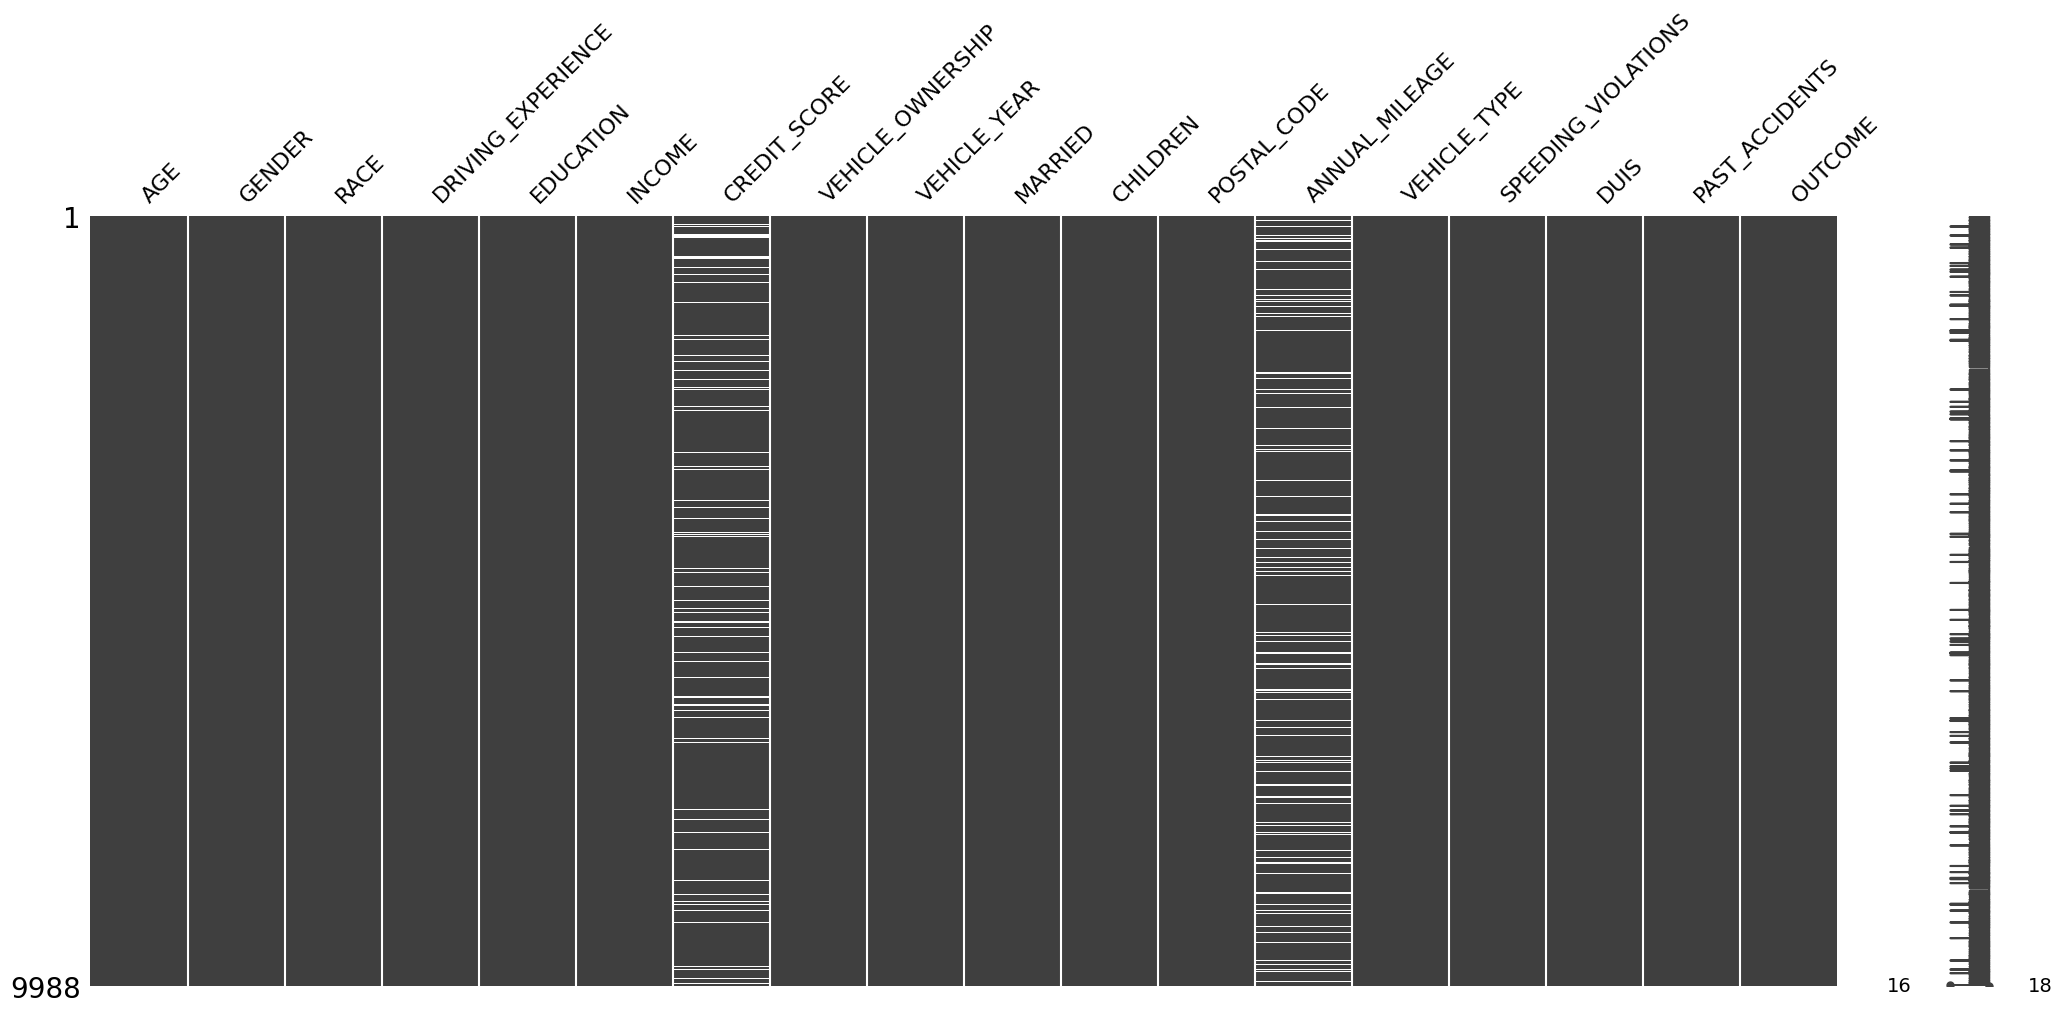

In [400]:
import missingno as msno
msno.matrix(df);

In [401]:
df['OUTCOME'].value_counts()

0.0    6864
1.0    3124
Name: OUTCOME, dtype: int64

In [402]:
df['OUTCOME'].value_counts(1)

0.0    0.687225
1.0    0.312775
Name: OUTCOME, dtype: float64

**There is 68.7% of customers haven't claimed loan while 31.2% of customers have claimed loan**

In [403]:
null_credit = df[df['CREDIT_SCORE'].isnull()]
null_credit['ANNUAL_MILEAGE'].isna().sum()

85

**The number of null values betwen CREDIT_SCORE and ANNUAL_MILEAGE have in common is only 85**

**We will try drop null values and explore effect this on the target**

In [404]:
df.dropna(inplace = True)

In [405]:
df['OUTCOME'].value_counts()

0.0    5613
1.0    2536
Name: OUTCOME, dtype: int64

In [406]:
df['OUTCOME'].value_counts(1)

0.0    0.688796
1.0    0.311204
Name: OUTCOME, dtype: float64

**We can notice that the distribution of percentage categories of outcome not affected**

In [407]:
df.shape

(8149, 18)

**Exploring any impossible values in numeric features**:

In [408]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000,8149.000000,8149.000000
mean,0.516368,0.699227,0.501043,0.689287,19725.567922,11693.45932,1.485581,0.240766,1.065530,0.311204
std,0.137684,0.458622,0.500030,0.462814,18784.308198,2822.35147,2.244711,0.557408,1.665623,0.463014
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.00000,0.000000,0.000000,0.000000,0.000000
25%,0.417891,0.000000,0.000000,0.000000,10238.000000,10000.00000,0.000000,0.000000,0.000000,0.000000
50%,0.526759,1.000000,1.000000,1.000000,10238.000000,12000.00000,0.000000,0.000000,0.000000,0.000000
75%,0.620074,1.000000,1.000000,1.000000,32765.000000,14000.00000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.00000,22.000000,6.000000,15.000000,1.000000


**From the summary statistics for the numeric features there isn't impossible values or unlogical**

Exploring any inconsistencies in categorical values

In [409]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [410]:
df['VEHICLE_TYPE'].value_counts()

sedan         7761
sports car     388
Name: VEHICLE_TYPE, dtype: int64

In [411]:
df['VEHICLE_YEAR'].value_counts()

before 2015    5642
after 2015     2507
Name: VEHICLE_YEAR, dtype: int64

In [412]:
df['INCOME'].value_counts()

upper class      3588
middle class     1727
poverty          1459
working class    1375
Name: INCOME, dtype: int64

In [413]:
df['EDUCATION'].value_counts()

high school    3404
university     3217
none           1528
Name: EDUCATION, dtype: int64

In [414]:
df['DRIVING_EXPERIENCE'].value_counts()

0-9y      2864
10-19y    2662
20-29y    1756
30y+       867
Name: DRIVING_EXPERIENCE, dtype: int64

In [415]:
df['AGE'].value_counts()

26-39    2475
40-64    2412
65+      1641
16-25    1621
Name: AGE, dtype: int64

In [416]:
df['GENDER'].value_counts()

female    4084
male      4065
Name: GENDER, dtype: int64

In [417]:
df['RACE'].value_counts()

majority    7323
minority     826
Name: RACE, dtype: int64

**There isn't inconsistencies and we can understand that class ' none ' in Education column means under high school based on Age column**

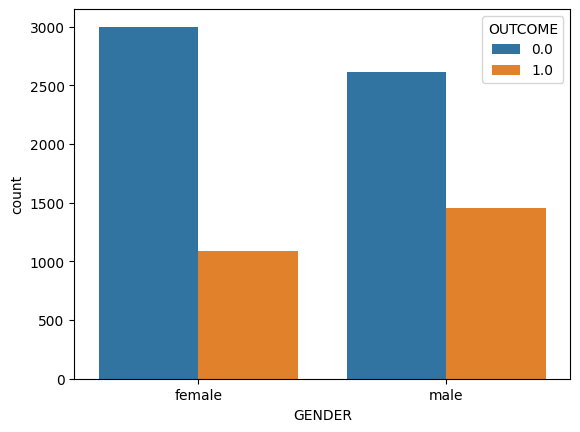

In [418]:
sns.countplot(data = df, x = 'GENDER',hue = 'OUTCOME');

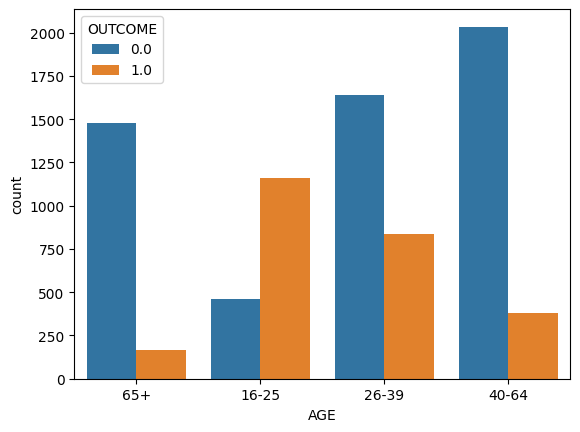

In [419]:
sns.countplot(data = df, x = 'AGE', hue = 'OUTCOME');

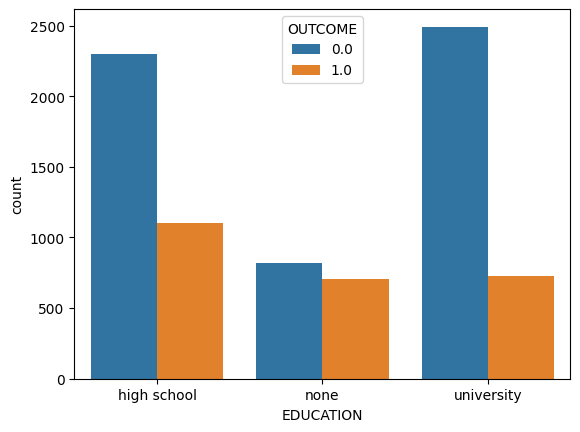

In [420]:
sns.countplot(data = df, x = 'EDUCATION',hue = 'OUTCOME');

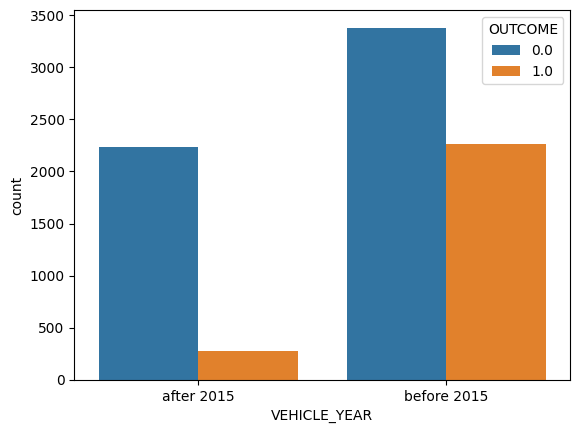

In [421]:
sns.countplot(data = df, x = 'VEHICLE_YEAR',hue = 'OUTCOME');

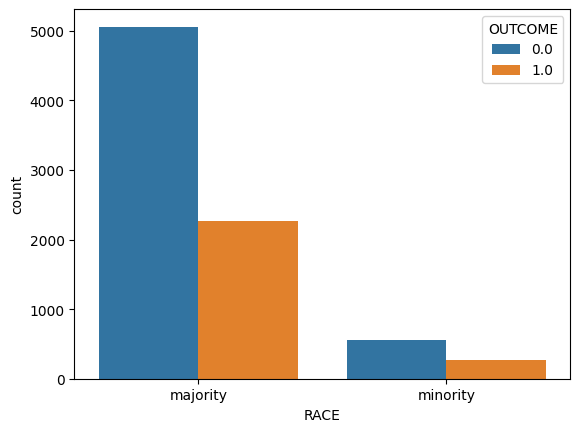

In [422]:
sns.countplot(data = df,x = 'RACE',hue = 'OUTCOME');

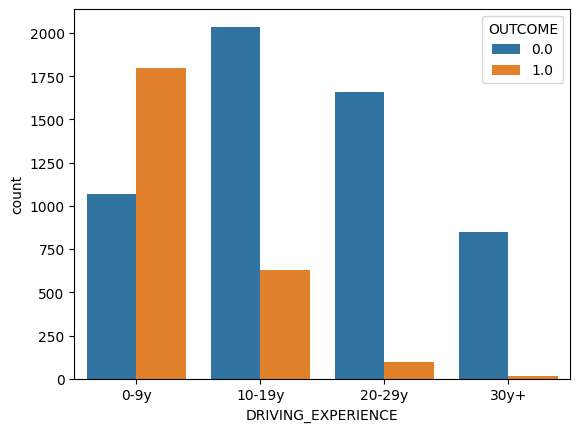

In [423]:
sns.countplot(data = df,x = 'DRIVING_EXPERIENCE',hue = 'OUTCOME');

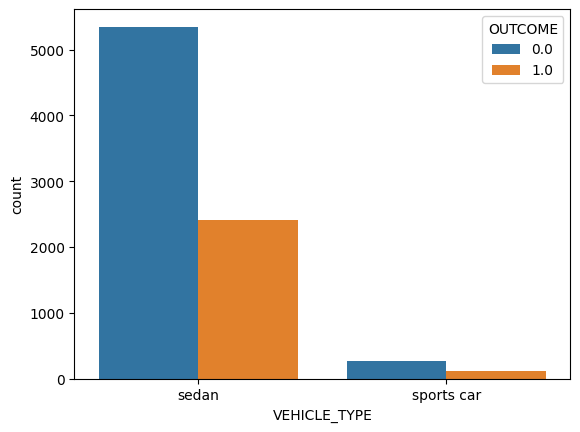

In [424]:
sns.countplot(data = df,x = 'VEHICLE_TYPE',hue = 'OUTCOME');

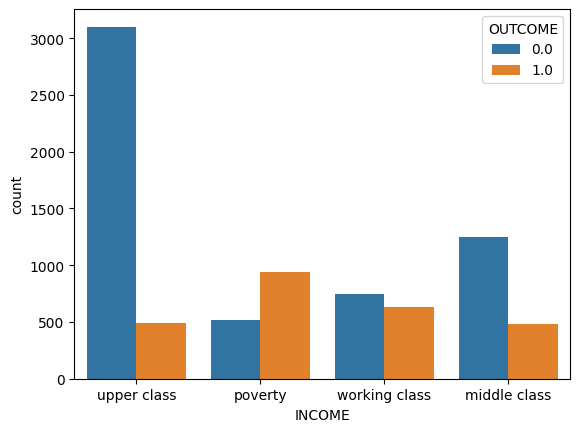

In [425]:
sns.countplot(data = df, x = 'INCOME',hue = 'OUTCOME');

**From the graphs above, we can say that the age group 16-25 years, driving experience less than 10 years, and the poverty category have more customers who obtained a loan than those who did not obtain a loan.**

####  **Stage two: choose the model**

**preprocessing**

In [426]:
target = 'OUTCOME'
X = df.drop(columns = target)
y = df[target]

In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [428]:
num_cols = X_train.select_dtypes('number').columns
num_scaler = StandardScaler()
num_pipe = make_pipeline(num_scaler)
num_tuple = ('Numeric',num_pipe,num_cols)

In [429]:
ord_cols = ['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME']
age_order = ['16-25','26-39','40-64','65+']
driv_order = ['0-9y','10-19y','20-29y','30y+']
edu_order = ['none','high school','university']
incom_order = ['poverty','working class','middle class','upper class']
ordinal_category_orders = [age_order,driv_order,edu_order,incom_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders )
ord_scaler = StandardScaler()
ord_pipe = make_pipeline(ord_encoder,ord_scaler)
ord_tuple = ('Ordinal',ord_pipe,ord_cols)

In [430]:
ohe_cols = X_train.select_dtypes('object').drop(columns = ord_cols).columns
ohe_encoder = OneHotEncoder(sparse_output= False , handle_unknown= 'ignore')
ohe_pipe = make_pipeline(ohe_encoder)
ohe_tuple = ('Categorical',ohe_pipe,ohe_cols)

**Fitting and Transforming**

In [431]:
preprocessor = ColumnTransformer([num_tuple,ord_tuple,ohe_tuple],verbose_feature_names_out= False)
preprocessor.fit(X_train)
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)

**Coustom Function to evaluate the model**

In [432]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4210
         1.0       1.00      1.00      1.00      1901

    accuracy                           1.00      6111
   macro avg       1.00      1.00      1.00      6111
weighted avg       1.00      1.00      1.00      6111



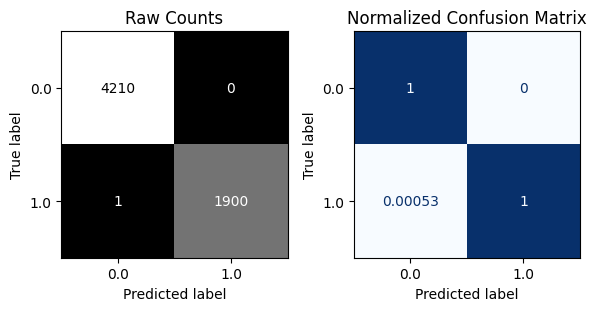


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      1403
         1.0       0.76      0.71      0.74       635

    accuracy                           0.84      2038
   macro avg       0.82      0.81      0.81      2038
weighted avg       0.84      0.84      0.84      2038



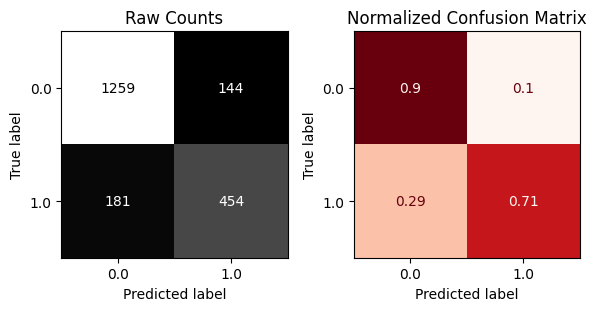

In [433]:
rf = RandomForestClassifier(random_state = 42 )
rf.fit(X_train_tf,y_train)
evaluate_classification(rf,X_train_tf, y_train, X_test_tf, y_test)

macro avg has 0.81 on the unseen data that is very good

**Extracting and visualizing the top 10 features using permutation importance**

In [434]:
feature_name = rf.feature_names_in_
importances = pd.Series(rf.feature_importances_ ,index = feature_name , name = "Feature Importance" )
sorted_importance = importances.sort_values(ascending= False)
top_10 = sorted_importance.head(10).index
top_10

Index(['CREDIT_SCORE', 'DRIVING_EXPERIENCE', 'ANNUAL_MILEAGE',
       'VEHICLE_OWNERSHIP', 'AGE', 'SPEEDING_VIOLATIONS', 'INCOME',
       'POSTAL_CODE', 'PAST_ACCIDENTS', 'EDUCATION'],
      dtype='object')

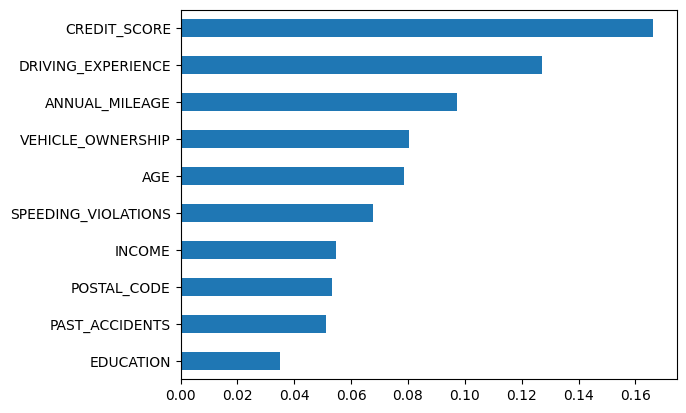

In [445]:
ax = sorted_importance.sort_values(ascending= True).tail(10).plot(kind='barh')

**On my opinion the top 10 features from 17 very logical excluding postal code.**